In [ ]:
!pip install ultralytics opencv-python matplotlib numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.5 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
def enhance_thermal(img):
    """Enhance thermal image using CLAHE for better contrast."""
    gray = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(gray)

def fuse_images(rgb, thermal, alpha=0.6, beta=0.4):
    """Fuse RGB and thermal images using weighted average."""
    if len(thermal.shape) == 2:  # single channel
        thermal = cv2.cvtColor(thermal, cv2.COLOR_GRAY2BGR)
    fused = cv2.addWeighted(rgb, alpha, thermal, beta, 0)
    return fused


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samdazel/teledyne-flir-adas-thermal-dataset-v2")

print("Path to dataset files:", path)

100%|██████████| 11.1G/11.1G [02:04<00:00, 95.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/samdazel/teledyne-flir-adas-thermal-dataset-v2/versions/11


In [ ]:
import kagglehub, os

path = kagglehub.dataset_download("samdazel/teledyne-flir-adas-thermal-dataset-v2")
print("✅ Dataset path:", path)

# Explore what’s inside
for root, dirs, files in os.walk(path):
    print("📂 Current folder:", root)
    print("Subfolders:", dirs[:5])
    print("Example files:", files[:5])
    break


Using Colab cache for faster access to the 'teledyne-flir-adas-thermal-dataset-v2' dataset.
✅ Dataset path: /kaggle/input/teledyne-flir-adas-thermal-dataset-v2
📂 Current folder: /kaggle/input/teledyne-flir-adas-thermal-dataset-v2
Subfolders: ['FLIR_ADAS_v2']
Example files: ['rgb_to_thermal_vid_map.json', 'md5sums_full.txt', 'README.txt']


In [ ]:
import kagglehub, os

# Step 1: Download / access dataset
path = kagglehub.dataset_download("samdazel/teledyne-flir-adas-thermal-dataset-v2")
print("✅ Dataset path:", path)

# Step 2: Explore structure automatically
for root, dirs, files in os.walk(path):
    print(f"\n📂 Folder: {root}")
    print("Subfolders:", dirs[:5])
    print("Example files:", files[:5])
    # only print top few levels
    if len(dirs) == 0:
        break


Using Colab cache for faster access to the 'teledyne-flir-adas-thermal-dataset-v2' dataset.
✅ Dataset path: /kaggle/input/teledyne-flir-adas-thermal-dataset-v2

📂 Folder: /kaggle/input/teledyne-flir-adas-thermal-dataset-v2
Subfolders: ['FLIR_ADAS_v2']
Example files: ['rgb_to_thermal_vid_map.json', 'md5sums_full.txt', 'README.txt']

📂 Folder: /kaggle/input/teledyne-flir-adas-thermal-dataset-v2/FLIR_ADAS_v2
Subfolders: ['video_rgb_test', 'images_thermal_train', 'images_rgb_val', 'images_thermal_val', 'images_rgb_train']
Example files: []

📂 Folder: /kaggle/input/teledyne-flir-adas-thermal-dataset-v2/FLIR_ADAS_v2/video_rgb_test
Subfolders: ['data']
Example files: ['annotation_counts.txt', 'index.json', 'coco.json', 'annotation_counts.tsv']

📂 Folder: /kaggle/input/teledyne-flir-adas-thermal-dataset-v2/FLIR_ADAS_v2/video_rgb_test/data
Subfolders: []
Example files: ['video-msNEBxJE5PPDqenBM-frame-008065-XgLBSm5reJN7uJxds.jpg', 'video-YnfPeH8i2uBWmsSd2-frame-000518-ufcSqHLfTXKmDDQcm.jpg', 'v

In [ ]:
# Base folder
base_path = "/kaggle/input/teledyne-flir-adas-thermal-dataset-v2/FLIR_ADAS_v2"

# Training RGB + Thermal folders
rgb_dir = f"{base_path}/images_rgb_train"
thermal_dir = f"{base_path}/images_thermal_train"


In [ ]:
import os

rgb_dir = "/kaggle/input/teledyne-flir-adas-thermal-dataset-v2/FLIR_ADAS_v2/images_rgb_train"
thermal_dir = "/kaggle/input/teledyne-flir-adas-thermal-dataset-v2/FLIR_ADAS_v2/images_thermal_train"

print("RGB folder exists?", os.path.exists(rgb_dir))
print("Thermal folder exists?", os.path.exists(thermal_dir))

print("Example RGB files:", os.listdir(rgb_dir)[:5])
print("Example Thermal files:", os.listdir(thermal_dir)[:5])


RGB folder exists? True
Thermal folder exists? True
Example RGB files: ['coco_annotation_counts.txt', 'index.json', 'coco.json', 'data', 'coco_annotation_counts.tsv']
Example Thermal files: ['analyticsData', 'coco_annotation_counts.txt', 'index.json', 'coco.json', 'data']


In [ ]:
import os, glob, cv2

# Base data folders
rgb_data_dir = "/kaggle/input/teledyne-flir-adas-thermal-dataset-v2/FLIR_ADAS_v2/images_rgb_train/data"
thermal_data_dir = "/kaggle/input/teledyne-flir-adas-thermal-dataset-v2/FLIR_ADAS_v2/images_thermal_train/data"

# Check contents
print("RGB sample files:", os.listdir(rgb_data_dir)[:5])
print("Thermal sample files:", os.listdir(thermal_data_dir)[:5])

# Get sorted lists of all images
rgb_files = sorted(glob.glob(f"{rgb_data_dir}/*"))
thermal_files = sorted(glob.glob(f"{thermal_data_dir}/*"))

print("Found RGB images:", len(rgb_files))
print("Found Thermal images:", len(thermal_files))

# Pick first pair
rgb_path = rgb_files[0]
thermal_path = thermal_files[0]

# Load images
rgb = cv2.imread(rgb_path)
rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
thermal = cv2.imread(thermal_path, cv2.IMREAD_UNCHANGED)

print("✅ RGB shape:", rgb.shape)
print("✅ Thermal shape:", thermal.shape)


RGB sample files: ['video-S8r6reaDHMLNFB5cA-frame-001200-Bqqpo5YEhx4sh4ego.jpg', 'video-gDiZcXxrNwEuxj8NJ-frame-005041-Qe2uaeLrb9zmiad4i.jpg', 'video-WPJrL5MznEAgqaD47-frame-006636-b78XsiGX7u2oLiG32.jpg', 'video-GiDQGbWeWwtNTQEnG-frame-002060-AoWZS4L5cTJE7bGT8.jpg', 'video-XnyceSsWCsR7niZps-frame-004331-DeKBw6L2HMzW528W3.jpg']
Thermal sample files: ['video-DJYDQTZH7GLCqw3Tx-frame-002394-Jy5cY9ZQcpTTWiesX.jpg', 'video-7ac97f4pH2W94Kgm4-frame-012300-X2bCKgcBqQMA22tT5.jpg', 'video-dgYrcYcm5G75w2GJc-frame-004706-xkbEEW5xrpuGoZyAr.jpg', 'video-Gfv3kbdf5KAYRtPcz-frame-004121-qvuJ8Asp95EeLHW3k.jpg', 'video-5YffDt2oYT6CDzYHk-frame-000220-q8AAPGrNTaW27JJEu.jpg']
Found RGB images: 10319
Found Thermal images: 10742
✅ RGB shape: (1600, 1800, 3)
✅ Thermal shape: (512, 640)


In [ ]:
base_path = "/kaggle/input/teledyne-flir-adas-thermal-dataset-v2/FLIR_ADAS_v2"
rgb_data_dir = os.path.join(base_path, "images_rgb_train/data")
thermal_data_dir = os.path.join(base_path, "images_thermal_train/data")


In [ ]:
import glob, os

rgb_files = sorted(glob.glob(os.path.join(rgb_data_dir, "*")))
thermal_files = sorted(glob.glob(os.path.join(thermal_data_dir, "*")))

rgb_path = rgb_files[0]
thermal_path = thermal_files[0]


In [ ]:
import cv2
rgb = cv2.imread(rgb_path)
rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
thermal = cv2.imread(thermal_path, cv2.IMREAD_UNCHANGED)


In [ ]:
thermal = cv2.resize(thermal, (rgb.shape[1], rgb.shape[0]))


In [ ]:
def enhance_thermal(img):
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    return clahe.apply(img)

thermal_enh = enhance_thermal(thermal)


In [ ]:
def fuse_images(rgb, thermal_gray):
    thermal_3ch = cv2.merge([thermal_gray]*3)
    return cv2.addWeighted(rgb, 0.6, thermal_3ch, 0.4, 0)

fused = fuse_images(rgb, thermal_enh)


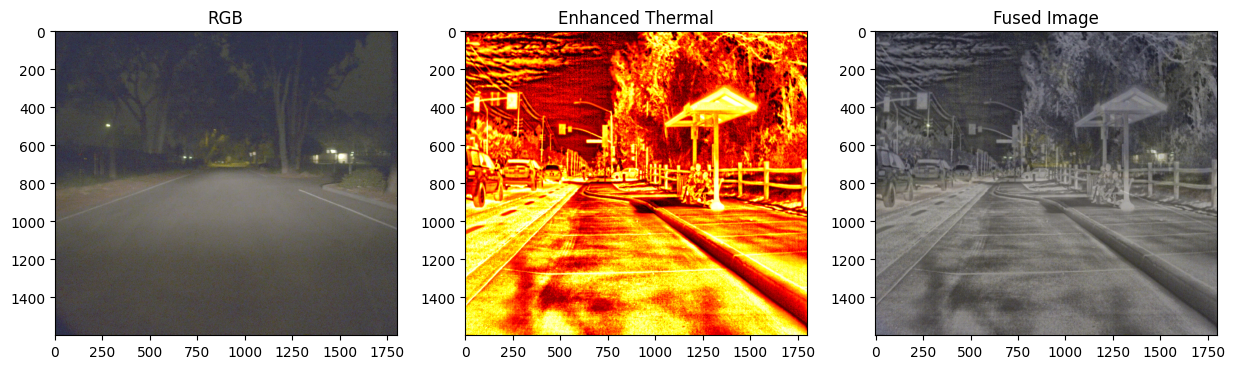

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(rgb); plt.title("RGB")
plt.subplot(1,3,2); plt.imshow(thermal_enh, cmap='hot'); plt.title("Enhanced Thermal")
plt.subplot(1,3,3); plt.imshow(fused); plt.title("Fused Image")
plt.show()


In [ ]:
!pip install ultralytics --quiet
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # pretrained on COCO


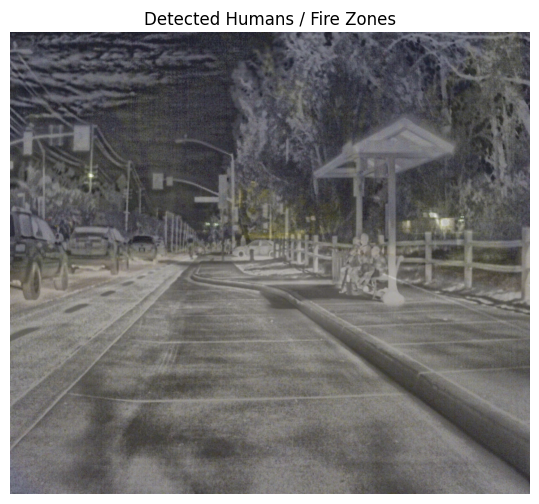

In [ ]:
fused_bgr = cv2.cvtColor(fused, cv2.COLOR_RGB2BGR)
results = model.predict(source=fused_bgr, conf=0.4, save=False, verbose=False)

# Draw detections
annotated = results[0].plot()

plt.figure(figsize=(10,6))
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.title("Detected Humans / Fire Zones")
plt.axis('off')
plt.show()


In [ ]:
import os
output_dir = "/kaggle/working/output"
os.makedirs(output_dir, exist_ok=True)

for i in range(len(rgb_files)):
    rgb = cv2.imread(rgb_files[i])
    rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
    thermal = cv2.imread(thermal_files[i], cv2.IMREAD_UNCHANGED)
    thermal = cv2.resize(thermal, (rgb.shape[1], rgb.shape[0]))
    thermal_enh = enhance_thermal(thermal)
    fused = fuse_images(rgb, thermal_enh)

    fused_bgr = cv2.cvtColor(fused, cv2.COLOR_RGB2BGR)
    results = model.predict(source=fused_bgr, conf=0.4, verbose=False)
    annotated = results[0].plot()

    out_path = os.path.join(output_dir, f"fused_{i:04d}.jpg")
    cv2.imwrite(out_path, annotated)
    print(f"Processed {i+1}/{len(rgb_files)}")


Processed 1/10319
Processed 2/10319
Processed 3/10319
Processed 4/10319
Processed 5/10319
Processed 6/10319
Processed 7/10319
Processed 8/10319
Processed 9/10319
Processed 10/10319
Processed 11/10319
Processed 12/10319
Processed 13/10319
Processed 14/10319
Processed 15/10319
Processed 16/10319
Processed 17/10319
Processed 18/10319
Processed 19/10319
Processed 20/10319
Processed 21/10319
Processed 22/10319
Processed 23/10319
Processed 24/10319
Processed 25/10319
Processed 26/10319
Processed 27/10319
Processed 28/10319
Processed 29/10319
Processed 30/10319
Processed 31/10319
Processed 32/10319
Processed 33/10319
Processed 34/10319
Processed 35/10319
Processed 36/10319
Processed 37/10319
Processed 38/10319
Processed 39/10319
Processed 40/10319
Processed 41/10319
Processed 42/10319
Processed 43/10319
Processed 44/10319
Processed 45/10319
Processed 46/10319
Processed 47/10319
Processed 48/10319
Processed 49/10319
Processed 50/10319
Processed 51/10319
Processed 52/10319
Processed 53/10319
Pr

KeyboardInterrupt: 

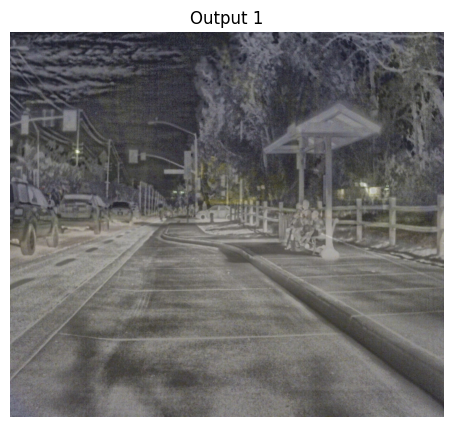

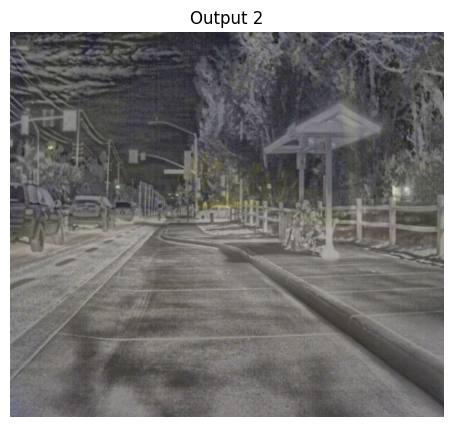

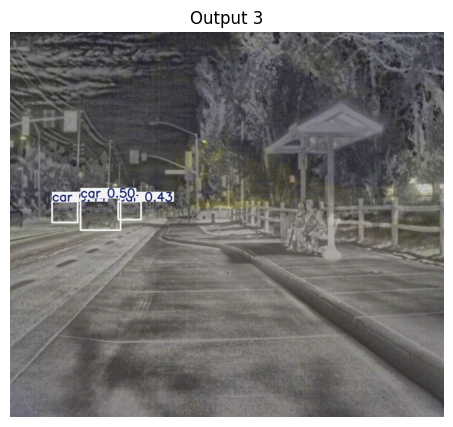

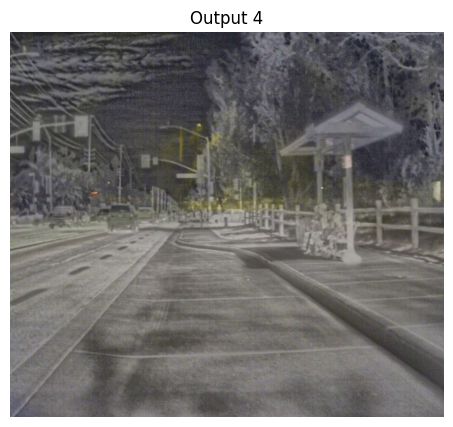

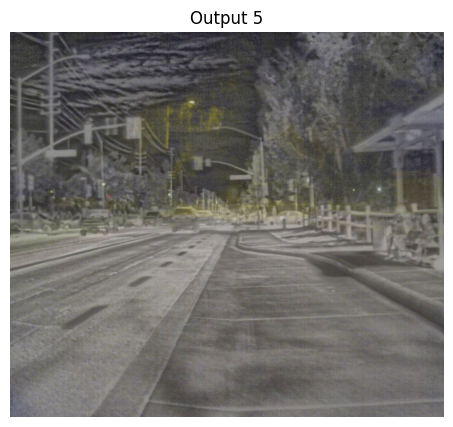

In [ ]:
import glob
out_imgs = sorted(glob.glob(os.path.join(output_dir, "*.jpg")))

for i, path in enumerate(out_imgs[:5]):
    img = cv2.imread(path)
    plt.figure(figsize=(8,5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Output {i+1}")
    plt.axis('off')
    plt.show()


In [ ]:
#Laplacian Pyramid Fusion

In [ ]:
def laplacian_pyramid_fusion(rgb, thermal_gray, levels=3):
    import cv2
    import numpy as np

    # Convert to float32
    rgb = rgb.astype(np.float32)
    # Convert thermal to 3-channel to match RGB
    thermal_gray = cv2.merge([thermal_gray]*3).astype(np.float32)

    # Generate Gaussian pyramids
    gp_rgb = [rgb]
    gp_thermal = [thermal_gray]
    for i in range(levels):
        gp_rgb.append(cv2.pyrDown(gp_rgb[-1]))
        gp_thermal.append(cv2.pyrDown(gp_thermal[-1]))

    # Generate Laplacian pyramids
    lp_rgb = [gp_rgb[-1]]
    lp_thermal = [gp_thermal[-1]]
    for i in range(levels,0,-1):
        lp_rgb.append(cv2.subtract(gp_rgb[i-1], cv2.pyrUp(gp_rgb[i])))
        lp_thermal.append(cv2.subtract(gp_thermal[i-1], cv2.pyrUp(gp_thermal[i])))

    # Fuse pyramids by averaging
    lp_fused = [0.5*(l_r + l_t) for l_r,l_t in zip(lp_rgb, lp_thermal)]

    # Reconstruct fused image
    fused = lp_fused[0]
    for i in range(1, levels+1):
        fused = cv2.pyrUp(fused)
        fused = cv2.add(fused, lp_fused[i])

    # Clip to 0-255 and convert to uint8
    fused = np.clip(fused, 0, 255).astype(np.uint8)
    return fused


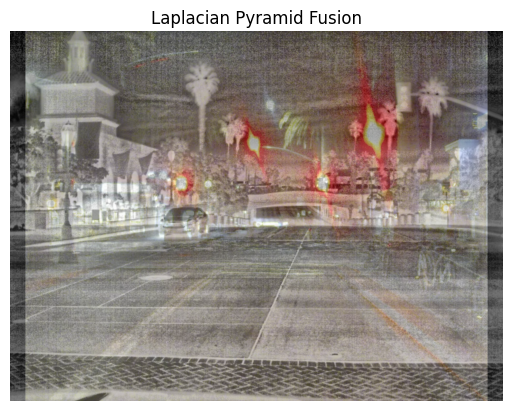

In [ ]:
fused_lap = laplacian_pyramid_fusion(rgb, thermal_enh)
plt.imshow(fused_lap)
plt.title("Laplacian Pyramid Fusion")
plt.axis('off')
plt.show()
